### Credit Risk

## Data ingestion / File reading

In [39]:
path =r"D:\ML\CreditRisk.xlsx"

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_excel(path)

### Basic checks and quality checks

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [45]:
### Check missing obsnervations
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
### Check duplicate observations
df.duplicated().sum()

np.int64(0)

In [47]:
### drop loan id
df.drop('Loan_ID',axis=1,inplace=True)

In [48]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## seperation of x and y

In [49]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [50]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [51]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

### 

<Axes: ylabel='Loan_Status'>

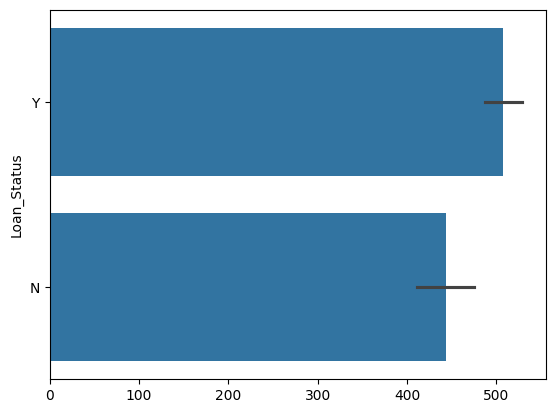

In [52]:
sns.barplot(y)

In [53]:
a = y.value_counts()

In [54]:
a

Loan_Status
Y    712
N    269
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

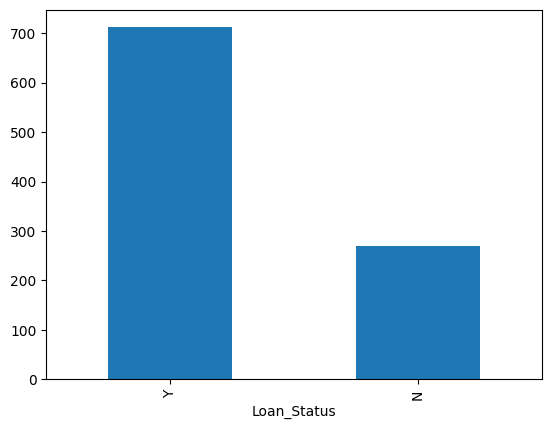

In [55]:
a.plot(kind='bar')

### Sepration of cat and numerical data

In [56]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [57]:
print(cat)
print()
print(num)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


### Create Pipeline

In [59]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [60]:
pre = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, cat),
    ('num', num_pipeline, num)
])

In [61]:
pre

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


### Apply Pipeline on data

In [62]:
x_scaled = pre.fit_transform(x)

In [63]:
x_scaled

array([[ 0.        ,  1.        ,  1.        , ..., -0.2102906 ,
         0.2705276 ,  0.42151046],
       [ 0.        ,  1.        ,  0.        , ..., -0.18409773,
         0.2705276 ,  0.42151046],
       [ 0.        ,  1.        ,  0.        , ..., -0.99607683,
         0.2705276 ,  0.42151046],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.2102906 ,
         0.2705276 ,  0.42151046],
       [ 0.        ,  1.        ,  0.        , ...,  0.20879539,
         0.2705276 ,  0.42151046],
       [ 0.        ,  1.        ,  1.        , ..., -0.57699084,
        -2.52237248,  0.42151046]], shape=(981, 17))

### Convert in dataframe

In [64]:
pre.get_feature_names_out()

array(['cat__Gender_Female', 'cat__Gender_Male', 'cat__Married_No',
       'cat__Married_Yes', 'cat__Education_Graduate',
       'cat__Education_Not Graduate', 'cat__Self_Employed_No',
       'cat__Self_Employed_Yes', 'cat__Property_Area_Rural',
       'cat__Property_Area_Semiurban', 'cat__Property_Area_Urban',
       'num__Dependents', 'num__ApplicantIncome',
       'num__CoapplicantIncome', 'num__LoanAmount',
       'num__Loan_Amount_Term', 'num__Credit_History'], dtype=object)

In [65]:
x_scaled = pd.DataFrame(x_scaled,columns=pre.get_feature_names_out())

In [66]:
x_scaled

,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,num__Dependents,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.689314,0.117565,-0.589506,-0.210291,0.270528,0.42151
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.112841,-0.104844,-0.034561,-0.184098,0.270528,0.42151
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.689314,-0.382944,-0.589506,-0.996077,0.270528,0.42151
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.689314,-0.456202,0.278239,-0.288869,0.270528,0.42151
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.689314,0.144093,-0.589506,-0.013844,0.270528,0.42151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.519307,-0.205684,0.064431,-0.380544,0.270528,0.42151
977,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.689314,-0.179508,-0.328594,-0.354351,0.270528,0.42151
978,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.689314,-0.339024,0.143919,-0.210291,0.270528,0.42151
979,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.689314,-0.031586,0.291119,0.208795,0.270528,0.42151


### Train test split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train , x_test , y_train , y_test  = train_test_split(x_scaled, y, test_size=0.2, random_state=34)

In [69]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(784, 17) (784,)
(197, 17) (197,)


In [70]:
x_test.head()

,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,num__Dependents,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
778,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.112841,-0.351322,0.282655,-0.812727,-1.591406,0.42151
851,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.914997,0.173255,4.556246,-0.524605,0.270528,0.42151
379,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.914997,0.037104,-0.589506,-0.157905,0.270528,0.42151
396,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.689314,-0.351322,-0.589506,-0.930595,0.270528,-2.37242
694,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.519307,-0.237306,-0.183602,0.274278,0.270528,-2.37242


In [71]:
y_test.head()

778    Y
851    Y
379    Y
396    N
694    N
Name: Loan_Status, dtype: object

In [72]:
x_train.head()

,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,num__Dependents,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
776,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.689314,0.070835,-0.589506,-0.341255,0.270528,0.42151
677,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.689314,-0.540880,-0.037505,-0.446026,0.270528,-2.37242
285,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.689314,-0.355187,0.534000,-0.694859,0.270528,0.42151
877,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.112841,2.399811,-0.589506,1.204125,0.270528,0.42151
265,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.689314,-0.190576,0.678992,0.117120,0.270528,0.42151


In [73]:
y_train.head()

776    Y
677    N
285    Y
877    Y
265    Y
Name: Loan_Status, dtype: object

## Model fiting

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( n_jobs=-1)

## Model evaluation

In [75]:
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Training evaluation

In [76]:
train_pred = model.predict(x_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.